In [1]:
from generate_data import generate_data
from gibbs import GibbsSampler
import numpy as np
import matplotlib.pyplot as plt

# Setup and EDA

## Generate Data Sets

In [2]:
independent_data = generate_data()
correlated_data = generate_data(0.9)

## Plot Mean and Variance Over Time

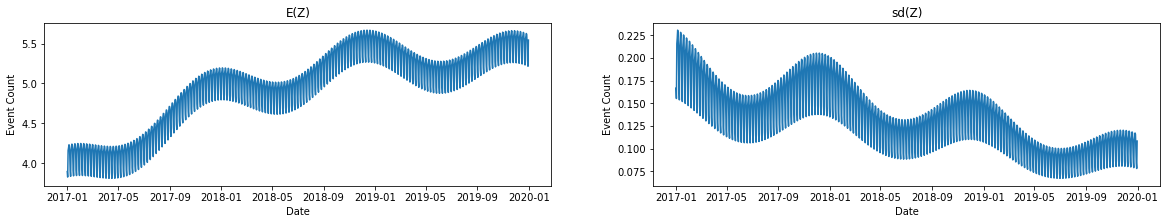

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 3))

ax1.plot(independent_data.days, independent_data.mu, label="mean")
ax1.set_xlabel("Date")
ax1.set_ylabel("Event Count")
ax1.set_title("E(Z)")

ax2.plot(independent_data.days, independent_data.sigma, label="standard deviation")
ax2.set_xlabel("Date")
plt.ylabel("Event Count")
ax2.set_title("sd(Z)")

plt.savefig("./figures/mean_var_functions.png")
plt.show()

## Compare Data Sets

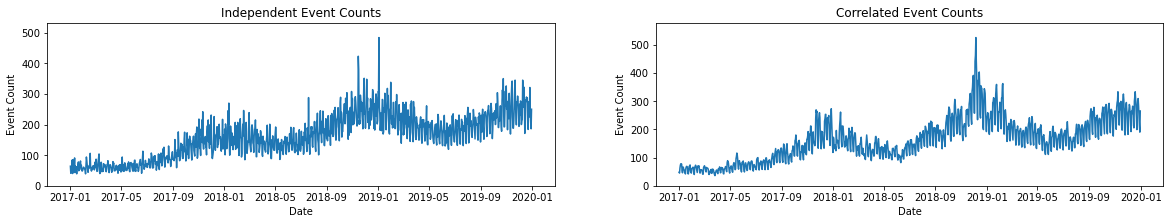

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 3))

ax1.plot(independent_data.days, independent_data.y)
ax1.set_ylim((0, 1.1*np.max(independent_data.y)))
ax1.set_xlabel("Date")
ax1.set_ylabel("Event Count")
ax1.set_title("Independent Event Counts")

ax2.plot(correlated_data.days, correlated_data.y)
ax2.set_ylim((0, 1.1*np.max(correlated_data.y)))
ax2.set_xlabel("Date")
ax2.set_ylabel("Event Count")
ax2.set_title("Correlated Event Counts")

fig.savefig("./figures/events_over_time.png")
plt.show()

# Model-fitting
## Independent Data

In [5]:
gibbs_ind_ind = GibbsSampler()
gibbs_ind_cor = GibbsSampler(alpha_rho=1, beta_rho=1)

In [6]:
gibbs_ind_ind.fit(independent_data, n_iter=10)

In [ ]:
gibbs_ind_cor.fit(independent_data, n_iter=10)

## Correlated Data

In [ ]:
independent_gibbs.fit(correlated_data, n_iter=100)

In [ ]:
correlated_gibbs.fit(correlated_data, n_iter=100)

# Analysis

In [ ]:
# Show that both models recover E(Z) and sd(Z) quite well

In [ ]:
# Show that model fit to data is about the same

In [ ]:
# Show that the correlated model does better as recovering E(Z) and sd(Z)

In [ ]:
# Show that independent model fits data more closely, so the issue is overfitting

# Extra Code

In [7]:
a = gibbs_ind_ind.alpha.values[30:, 0]
import pandas as pd
df = pd.DataFrame({
    "a_lead": a[1:],
    "a": a[:-1]
})
np.mean(df.a_lead != df.a)

NameError: name 'independent_gibbs' is not defined

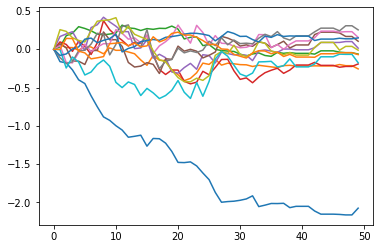

In [8]:
plt.plot(gibbs_ind_ind.alpha.values)
plt.show()

In [9]:
gibbs_ind_ind.alpha

array([-2.  , -0.2 , -0.03, -0.3 ,  0.03,  0.06,  0.1 ,  0.09, -0.04,
       -0.23,  0.16, -0.05])

[]

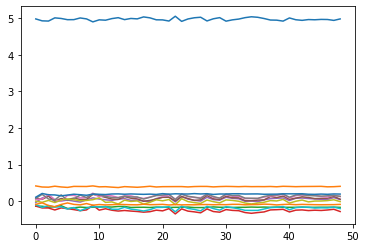

In [13]:
plt.plot(gibbs_ind_ind.beta.values[1:, :])
plt.plot()

In [11]:
gibbs_ind_ind.beta.values.mean(axis=0)

array([ 4.87150837e+00,  3.88999956e-01, -1.60477164e-01, -2.44917077e-01,
        4.67042986e-02,  7.50704414e-02,  1.21695569e-01,  1.25928540e-01,
       -2.25022624e-03, -1.88025107e-01,  1.86050329e-01, -9.08189315e-02])

In [12]:
independent_data.beta

array([ 5.  ,  0.4 , -0.17, -0.3 ,  0.03,  0.06,  0.1 ,  0.09, -0.04,
       -0.23,  0.2 , -0.1 ])

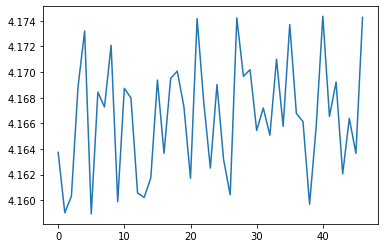

In [15]:
plt.plot(gibbs_ind_ind.z.values[3:, 0])
plt.show()